<a href="https://colab.research.google.com/github/prathaban-sr/eva6/blob/main/EVA_Session3_Pytorch_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from random import randint

In [ ]:
# now let's work with FashionMnist

train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)



In [25]:

from torch.utils.data import Dataset

class MyNISTRandom(Dataset):
  def __init__(self, train_set):
    self.data = train_set

  def __getitem__(self, index):
    r = self.data[index]
    image, label = r
    randnum = randint(0, 9)
    randnum_onehot = F.one_hot(torch.tensor(randnum), num_classes=10)
    sum = label + randnum
    return image, randnum_onehot, label, sum

  def __len__(self):
    return len(self.data)

In [26]:
train_data = MyNISTRandom(train_set)
#next(iter(train_data))[1:4]
train_loader = torch.utils.data.DataLoader(train_data
    ,batch_size=32
    ,shuffle=True
)

In [27]:
torch.set_printoptions(linewidth=120)

In [41]:
batch = next(iter(train_loader))
images, randnums, labels, sums = batch

labels: tensor([3, 6, 0, 3, 7, 2, 9, 1, 3, 5, 1, 9, 2, 9, 5, 1, 5, 5, 6, 2, 4, 7, 7, 8, 3, 8, 1, 7, 1, 6, 1, 9])
randnums: [4, 2, 9, 7, 6, 8, 2, 8, 9, 5, 3, 5, 2, 9, 3, 1, 1, 9, 7, 6, 1, 2, 5, 5, 4, 1, 8, 2, 7, 3, 0, 1]
sums: tensor([ 7,  8,  9, 10, 13, 10, 11,  9, 12, 10,  4, 14,  4, 18,  8,  2,  6, 14, 13,  8,  5,  9, 12, 13,  7,  9,  9,  9,
         8,  9,  1, 10])


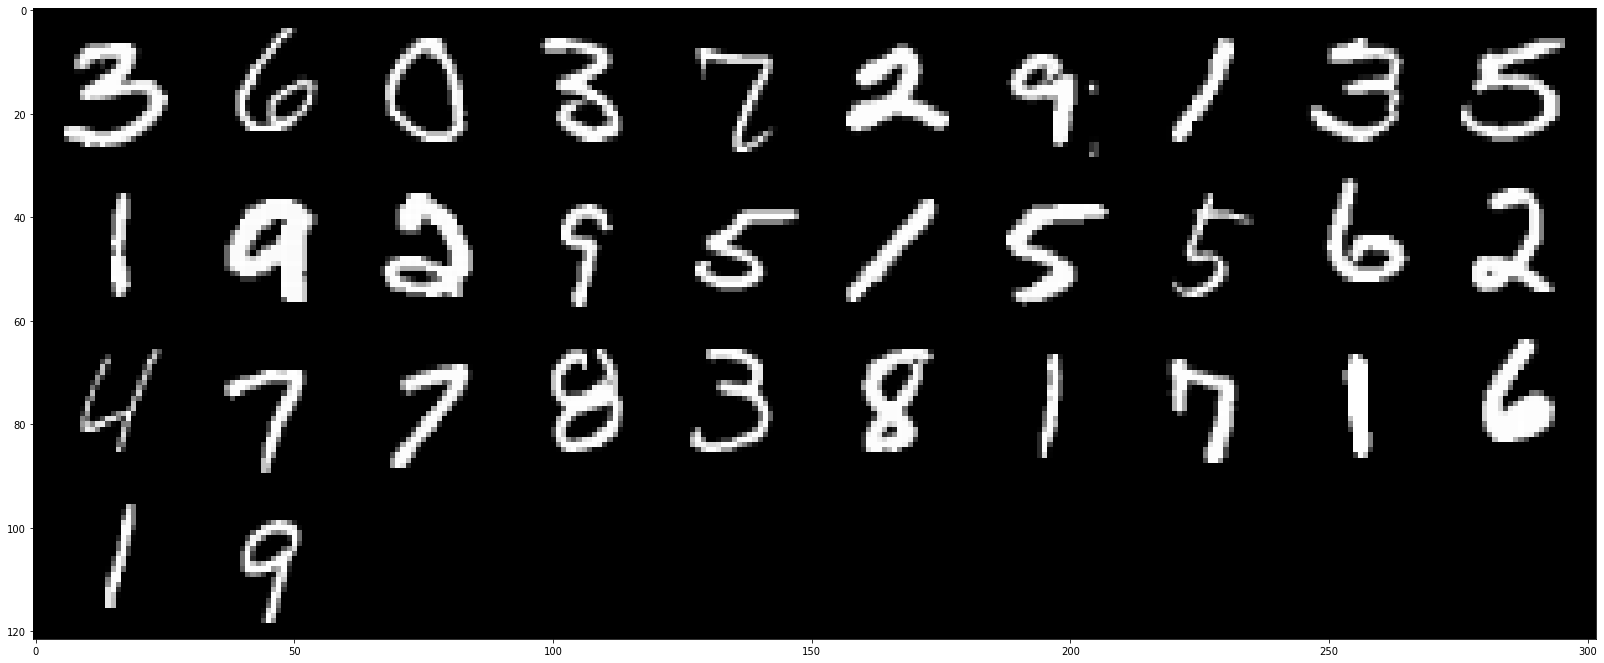

In [40]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(28,28))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)
print('randnums:',[randnum.tolist().index(1) for randnum in randnums])
print('sums:',sums)

In [ ]:
network.fc1.weight.shape

for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)
    

torch.Size([120, 192])

In [53]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 10 * 10, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

        self.fc3 = nn.Linear(in_features=10, out_features=40)
        self.fc4 = nn.Linear(in_features=10, out_features=40)
        self.randout = nn.Linear(in_features=40, out_features=10)


    def forward(self, img, num):
        # (1) input layer
        t = img

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 10 * 10)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        print("img nn done")
        # (7) hidden linear layer
        x = num
        x = self.fc3(x)
        x = F.relu(x)

        print("randnum nn done")

        # (8) hidden linear layer
        x = self.fc4(x)
        x = F.relu(x)

        # (9) num output layer
        x = self.randout(x)
        #t = F.softmax(t, dim=1)

        return t,x

In [63]:
from torch.autograd import Variable

network = Network()
print(randnums[0],images[0].unsqueeze(0).shape)

pred = network(images[0].unsqueeze(0),Variable(randnums[0]))

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) torch.Size([1, 1, 28, 28])
img nn done


RuntimeError: ignored

In [49]:
pred

tensor([[-0.1044,  0.0266,  0.0081,  0.0484, -0.0714,  0.0947, -0.0886, -0.0978,  0.0546, -0.0217]],
       grad_fn=<AddmmBackward>)

In [ ]:
pred.shape

torch.Size([1, 10])

In [ ]:
label

9

In [ ]:
pred.argmax(dim=1)

tensor([3])

In [ ]:
F.softmax(pred, dim=1)

tensor([[0.1063, 0.0877, 0.1084, 0.1096, 0.1027, 0.0887, 0.1036, 0.0987, 0.1041, 0.0903]])

In [ ]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)

In [ ]:
data_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=10
)

batch = next(iter(data_loader))
len(batch)

2

In [ ]:
batch[1]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [ ]:
images, labels = batch

preds = network(images)

preds.shape

torch.Size([10, 10])

In [ ]:
preds

tensor([[ 0.0816, -0.1112,  0.1009,  0.1120,  0.0473, -0.0994,  0.0560,  0.0070,  0.0611, -0.0816],
        [ 0.0914, -0.1194,  0.0969,  0.1095,  0.0628, -0.1366,  0.0687,  0.0122,  0.0501, -0.0817],
        [ 0.0730, -0.1224,  0.0813,  0.1092,  0.0373, -0.1244,  0.0505,  0.0382,  0.0449, -0.0712],
        [ 0.0813, -0.1207,  0.0807,  0.1122,  0.0468, -0.1338,  0.0531,  0.0257,  0.0484, -0.0778],
        [ 0.0973, -0.1128,  0.0982,  0.1175,  0.0542, -0.1313,  0.0619,  0.0122,  0.0549, -0.0817],
        [ 0.0889, -0.1206,  0.0944,  0.1051,  0.0553, -0.1295,  0.0586,  0.0134,  0.0492, -0.0798],
        [ 0.0777, -0.1149,  0.0975,  0.1058,  0.0445, -0.1079,  0.0521,  0.0247,  0.0516, -0.0779],
        [ 0.0932, -0.1201,  0.1005,  0.1023,  0.0618, -0.1317,  0.0715,  0.0107,  0.0551, -0.0835],
        [ 0.0715, -0.1179,  0.0812,  0.1113,  0.0282, -0.1131,  0.0554,  0.0433,  0.0489, -0.0709],
        [ 0.0725, -0.1180,  0.0925,  0.1137,  0.0426, -0.1073,  0.0619,  0.0259,  0.0501, -0.0837]])

In [ ]:
preds.argmax(dim=1)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False,  True, False, False, False, False, False, False])

In [ ]:
preds.argmax(dim=1).eq(labels).sum()

tensor(1)

In [ ]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
get_num_correct(preds, labels)

1

# Training

During the entire training process, we do as many epochs as necessary to reach our desired level of accuracy. With this, we have the following steps:

Get batch from the training set.
Pass batch to network.
Calculate the loss (difference between the predicted values and the true values).
Calculate the gradient of the loss function w.r.t the network's weights.
Update the weights using the gradients to reduce the loss.
Repeat steps 1-5 until one epoch is completed.
Repeat steps 1-6 for as many epochs required to reach the minimum loss.

In [ ]:
import torch.optim as optim

torch.set_grad_enabled(True) # remember we turned off the gradients?

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.291531801223755

In [ ]:
print(network.conv1.weight.grad)

None


In [ ]:
loss.backward()

In [ ]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [ ]:
print(network.conv1.weight.grad)

tensor([[[[-4.2777e-04, -2.0295e-05,  4.6556e-04,  6.4263e-04,  7.3155e-04],
          [-7.0952e-05,  1.6402e-03,  1.3985e-03,  1.4935e-03,  1.0185e-03],
          [ 2.4083e-03,  2.8564e-03,  3.9051e-03,  2.8649e-03,  5.1906e-04],
          [ 2.2142e-03,  3.1485e-03,  4.0610e-03,  2.8386e-03,  1.4271e-03],
          [ 3.6889e-03,  4.8106e-03,  4.5907e-03,  5.3331e-03,  2.1127e-03]]],


        [[[-8.4137e-03, -6.3796e-03, -4.0158e-03, -3.3010e-03, -4.1751e-03],
          [-5.4072e-03, -3.4162e-03, -3.3321e-03, -1.6563e-03, -6.6331e-04],
          [-3.9487e-03, -5.4645e-03, -4.7334e-03, -2.1279e-03, -1.8561e-03],
          [-4.8411e-03, -5.7962e-03, -4.6853e-03, -3.0206e-03, -4.0307e-03],
          [-4.3002e-03, -3.5298e-03, -5.5162e-03, -4.6712e-03, -2.8343e-03]]],


        [[[-9.0761e-04, -6.4341e-04,  3.2280e-05,  4.1065e-04, -7.1516e-04],
          [-1.8254e-03, -1.4419e-03, -4.8471e-05,  6.3392e-04,  8.8503e-04],
          [-2.7132e-03, -2.0410e-03,  1.7418e-04,  1.2314e-03,  2.11

In [ ]:
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [ ]:
loss.item(), get_num_correct(preds, labels)

(2.291531801223755, 1)

In [ ]:
optimizer.step()

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.104419231414795, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(1.787622094154358, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(1.934936285018921, 2)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(1.4897394180297852, 7)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(1.7039096355438232, 5)

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.304684638977051
loss2: 2.2856671810150146


In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch 

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch: 0 total_correct: 47941 loss: 321.5587496459484


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 51614 loss: 231.37973248958588
epoch 1 total_correct: 52266 loss: 207.98942489922047
epoch 2 total_correct: 52726 loss: 197.29836356639862
epoch 3 total_correct: 52936 loss: 191.7567794471979
epoch 4 total_correct: 53048 loss: 188.0561916679144
epoch 5 total_correct: 53228 loss: 183.5161340534687
epoch 6 total_correct: 53460 loss: 178.34145548194647
epoch 7 total_correct: 53486 loss: 175.99129674583673
epoch 8 total_correct: 53556 loss: 176.15813145041466
epoch 9 total_correct: 53423 loss: 178.52147017419338


Please cover this whole [PyTorch Series](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG) (also the reference for our code) for even better understanding. 